In [1]:
import unicodecsv
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

## Import

## Product, Style, Model, Color

In [2]:
product = pd.read_csv('../../2_data/explored/product.csv')
style = pd.read_csv('../../2_data/explored/style.csv')
model = pd.read_csv('../../2_data/explored/md2t_model.csv')
cat2 = pd.read_csv('../../2_data/explored/md4t_cat2.csv')
color = pd.read_csv('../../2_data/explored/md6t_catcolor.csv')

In [3]:
product.drop(product.columns[[2,3,5,7,9,11]], axis=1, inplace = True)

# Merge dataframe

In [4]:
product_style = pd.merge(product, style,  how='left', left_on=['STY_ID'], right_on = ['STY_ID'])
product_style_model = pd.merge(product_style, model,  how='left', left_on=['MVGR2'], right_on = ['NODE'])
product_style_model_color = pd.merge(product_style_model, color,  how='left', left_on=['MVGR6'], right_on = ['NODE'])
product_style_model_color_cat2 = pd.merge(product_style_model_color, cat2,  how='left', left_on=['MVGR4'], right_on = ['NODE'])
product_style_model_color_cat2.rename(columns={'MATNR' : 'Item_Codename' , 'NODE_x': 'Node_model', 'LTEXT_x': 'Model', 'LTEXT_T_x': 'Model_T', 'NODE_y': 'Node_Color', 'LTEXT_y': 'Color', 'LTEXT_T_y': 'Color_T','STYLE': 'Style', 'NODE' : 'Node_Cat2', 'LTEXT': 'Cat2'}, inplace=True)
product_merge = product_style_model_color_cat2
df_product = product_merge[['Item_Codename','Model','Color','Style','Cat2']]
df_product_f = df_product.fillna('zNone')
df_product.reset_index(drop=True)

,Item_Codename,Model,Color,Style,Cat2
0,19047936,Patisia,WHITE,Vintage,ตู้ข้างเตียง
1,19045101,Cannery,YELLOW,Modern,โซฟา 3 ที่นั่ง
2,19050282,NaN,MULTI-COLOUR,Vintage,กรอบรูป
3,59000365,Meudon,DARK SHADE,Contemporary,ชุดห้องนอน
4,59001810,Alicia,WHITE,Modern,ชุดห้องนอน
5,19049900,Santana,WHITE,Modern,โซฟาเข้ามุมขวา
6,19040929,Bella,BROWN,Modern Italian,โซฟา 3 ที่นั่ง
7,19045046,Jovi,BLACK,Modern,โซฟา 4 ที่นั่ง
8,19045211,Grazia,WALNUT,Contemporary,เตียง
9,59000343,Koloze,WALNUT,Modern,NaN


# Prepare Data

In [5]:
df_model = df_product.drop_duplicates(subset=['Model'])
df_model.sort_values("Model", inplace=True)
df_model_idx = df_model.reset_index(drop=True)
df_model_idx.insert(0, 'Model_id', range(1, 1 + len(df_model)))
df_model_idx.drop(df_model_idx.columns[[1,3,4,5]], axis=1, inplace = True)
mult_model = (len(df_model_idx))*2.1
len_model = int(round(mult_model))
constant = len_model - len(df_model_idx)
cons = int(round(constant))
df_model_idx.loc[df_model_idx.Model == 'zNone', 'Model_id'] = len_model
df_color_old = df_product.drop_duplicates(subset=['Color'])
df_color_old.sort_values("Color", inplace=True)
df_color_old_idx = df_color_old.reset_index(drop=True)
df_color_old_idx.insert(0, 'Color_id_old', range(1, 1 + len(df_color_old)))
df_color_old_idx.drop(df_color_old_idx.columns[[1,2,4,5]], axis=1, inplace = True)
len_color_old = len(df_color_old_idx)
df_color_old_idx.loc[df_color_old_idx.Color == 'zNone', 'Color_id_old'] = len_color_old + constant
df_style = df_product.drop_duplicates(subset=['Style'])
df_style.sort_values("Style", inplace=True)
df_style_idx = df_style.reset_index(drop=True)
df_style_idx.insert(0, 'Style_id', range(1, 1 + len(df_style)))
df_style_idx.drop(df_style_idx.columns[[1,2,3,5]], axis=1, inplace = True)
len_style_idx = len(df_style_idx)
df_style_idx.loc[df_style_idx.Style == 'zNone', 'Style_id'] = len_style_idx + constant
df_cat2 = df_product.drop_duplicates(subset=['Cat2'])
df_cat2.sort_values("Cat2", inplace=True)
df_cat2_idx = df_cat2.reset_index(drop=True)
df_cat2_idx.insert(0, 'Cat2_id', range(1, 1 + len(df_cat2)))
df_cat2_idx.drop(df_cat2_idx.columns[[1,2,3,4]], axis=1, inplace = True)
len_cat2_idx = len(df_cat2_idx)
df_cat2_idx.loc[df_cat2_idx.Cat2 == 'zNone', 'Cat2_id'] = len_cat2_idx + constant
df_product = pd.merge(df_product, df_model_idx,  how='left', left_on=['Model'], right_on = ['Model'])
df_product = pd.merge(df_product, df_color_old_idx,  how='left', left_on=['Color'], right_on = ['Color'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on 

Change Data's Detail

In [6]:
df_product.Color = df_product.Color.replace(('WHITE', 'LIGHT SHADE' ,'WHITE SHADE' ,'LIGHT WHITE', 'COOL WHITE' , 'CLEAR' , 'WHITE OAK'  ,'CROCO WHITE' , 'ANTIQUE WHITE WASH', 'PEARL WHITE','Almond Yosemite','Camelia', 'REFLECT','MIRROR', 'CARRARA'), 'White')
df_product.Color = df_product.Color.replace(('YELLOW','CREAM','GLODEN SUN','IVORY'), 'Yellow')
df_product.Color = df_product.Color.replace(('BLACK','DARK SHADE','BLACK MUSTANG','CROCO BLACK','DARK SHERWOOD','SILVERA','DARK EBONY','CHARCOLE','BLACK MILLENIUM','B-AFRICA'), 'Black')
df_product.Color = df_product.Color.replace(('WENGE','ESPRESSO','Mahogany','WALNUT','AUTUMN BROWN','ROYAL ACACIA','SYRUP BROWN','Hazel Timber','COCOA BROWN','SIENNA YOSEMITE','EBONY'), 'Brown Dark')
df_product.Color = df_product.Color.replace(('BEECH','SOLID OAK','OAK','BEIGE','Canyon Oak','IVORY TWIST','TORTORA','Brass','SMOKE TIMBER','LIGHT OAK','FOREST MAPLE','MAPLE'), 'Brown Light')
df_product.Color = df_product.Color.replace(('BROWN','I-WALNUT','ITALIAN BROWN','CHERRY','HPL BRONZE WAVE','NATURAL','AMBER BROWN','BRONZE WAVE','NATURAL WOOD'), 'Brown')
df_product.Color = df_product.Color.replace(('PURPLE','VIOLET','MILD VIOLET','VIOLA'), 'Purple')
df_product.Color = df_product.Color.replace(('GREY','CROMIUM','SILVER','STAINLESS','GREY TWIST','ALUMINIUM','GREY WOOD RIFT','SATIN NIKLE','SOFT GREY','TRAVERTINE','GREY MIRROR','NICKEL GLOSS','ALUMINUM'), 'Grey')
df_product.Color = df_product.Color.replace(('BLUE','Denim'), 'Blue')
df_product.Color = df_product.Color.replace(('GREEN','LIGHT GREEN','TURQOUISE'), 'Green')
df_product.Color = df_product.Color.replace(('ORANGE'), 'Orange')
df_product.Color = df_product.Color.replace(('PINK','MID GLOSS'), 'Pink')
df_product.Color = df_product.Color.replace(('RED'), 'Red')
df_product.Color = df_product.Color.replace(('COLORFUL','MULTI-COLOUR'), 'Multi-Colour')
df_product.Color = df_product.Color.replace(('COPPER','HPL COPPER'), 'Copper')
df_product.Color = df_product.Color.replace(('GOLD','BRONZE','GOLD MIRROR'), 'Gold')
df_product.Color = df_product.Color.replace(('PRINTING'), 'Printing')

In [7]:
df_color = df_product.drop_duplicates(subset=['Color'])
df_color.sort_values("Color", inplace=True)
df_color_idx = df_color.reset_index(drop=True)
df_color_idx.insert(0, 'Color_id', range(1, 1 + len(df_color)))
df_color_idx.drop(df_color_idx.columns[[1,2,4,5,6,7]], axis=1, inplace = True)
len_color_idx = len(df_color_idx)
df_color_idx.loc[df_color_idx.Color == 'zNone', 'Color_id'] = len_color_idx + constant
df_product = pd.merge(df_product, df_color_idx,  how='left', left_on=['Color'], right_on = ['Color'])
df_product = pd.merge(df_product, df_style_idx,  how='left', left_on=['Style'], right_on = ['Style'])
df_product = pd.merge(df_product, df_cat2_idx,  how='left', left_on=['Cat2'], right_on = ['Cat2'])
del df_product['Color_id_old']
df_product_id = df_product

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Nearest Neighbors Model

In [8]:
from sklearn.neighbors import NearestNeighbors

input_item = 19111094
input_index = df_product_id.index[df_product_id['Item_Codename'] == input_item].tolist()[0]
call_frame = df_product_id.loc[(df_product_id.Item_Codename.isin([input_item])), ['Color_id', 'Style_id', 'Cat2_id']]
item = call_frame.values

product = df_product_id.iloc[:,6:9].values
nbrs = NearestNeighbors(n_neighbors=10).fit(product)
nbrs_res = nbrs.kneighbors([item[0]])[1]
result = nbrs_res.tolist()[0]
while input_index in result: result.remove(input_index)
print(result)
df_product_id.iloc[result]

[20457, 18799, 27189, 15235, 20497, 14578, 13755, 18906, 6389, 21675]


,Item_Codename,Model,Color,Style,Cat2,Model_id,Color_id,Style_id,Cat2_id
20457,19120264,Weekend,Grey,Modern,โซฟาเข้ามุมซ้าย,3628,9,12,208
18799,19115121,Cottage,Grey,Modern,โซฟาเข้ามุมซ้าย,930,9,12,208
27189,19125397,Gangza,Grey,Modern,โซฟาเข้ามุมซ้าย,1426,9,12,208
15235,19102425,Goda,Grey,Modern,โซฟาเข้ามุมซ้าย,1496,9,12,208
20497,19115416,Vonbin,Grey,Modern,โซฟาเข้ามุมซ้าย,3553,9,12,208
14578,19109490,Lassie,Grey,Modern,โซฟาเข้ามุมซ้าย,2236,9,12,208
13755,19081490,Scoote,Grey,Modern,โซฟาเข้ามุมซ้าย,3138,9,12,208
18906,19113812,Mulano,Grey,Modern,โซฟาเข้ามุมซ้าย,2644,9,12,208
6389,19086583,Ladiva,Grey,Modern,โซฟาเข้ามุมซ้าย,2189,9,12,208
21675,19126781,Rozanne,Grey,Modern,โซฟาเข้ามุมซ้าย,3059,9,12,208


Check Item

In [9]:
product_merge.loc[product_merge['Cat2'] == 'โซฟาสนาม']

,Item_Codename,MAKTX,MVGR2,MVGR4,MVGR6,STY_ID,Style,Node_model,Model,Model_T,Node_Color,Color,Color_T,Node_Cat2,Cat2,LTEXT_T
3632,19084443,โซฟาDERNELL/หวายสีขาว/ผ้าดำ/2S,LU2,I8,01,6,Modern,LU2,Dernell,NaN,01,WHITE,ขาว,I8,โซฟาสนาม,NaN
4162,19084440,โซฟาDEMOS/หวายสีธรรมชาติ/ผ้าดำ/2S,LU1,I8,53,6,Modern,LU1,Demos,NaN,53,NATURAL,เนเชอร์รอล,I8,โซฟาสนาม,NaN
4949,19084439,โซฟาDEMOS/หวายสีธรรมชาติ/ผ้าดำ/1S,LU1,I8,53,6,Modern,LU1,Demos,NaN,53,NATURAL,เนเชอร์รอล,I8,โซฟาสนาม,NaN
5032,19077837,DAYBED OLISA/หวายเทียมเทา/ครีม,KY2,I8,34,19,Industrial,KY2,Olisa,NaN,34,GREY,เทา,I8,โซฟาสนาม,NaN
5352,19077668,DAYBED HESPER/หวายเทียมเทาเข้ม/ผ้าดำ,KQ1,I8,34,6,Modern,KQ1,Hesper,NaN,34,GREY,เทา,I8,โซฟาสนาม,NaN
5568,19077674,โซฟา HALOYA/เทา/ผ้าดำ/2S,KQ5,I8,34,6,Modern,KQ5,Haloya,NaN,34,GREY,เทา,I8,โซฟาสนาม,NaN
5669,19077666,โซฟาHINDA/หวายเทียมขาว/ผ้าครีม/มุมซ้าย,KP9,I8,01,6,Modern,KP9,Hinda,NaN,01,WHITE,ขาว,I8,โซฟาสนาม,NaN
5946,19077659,โซฟาHARLOW/หวายเทียมเทาเข้ม/ดำ/มุมซ้าย,KP7,I8,34,6,Modern,KP7,Harlow,NaN,34,GREY,เทา,I8,โซฟาสนาม,NaN
10843,19077840,โซฟาODALIA//หวายเทียมขาว/2S,KY3,I8,01,6,Modern,KY3,Odalia,NaN,01,WHITE,ขาว,I8,โซฟาสนาม,NaN
12222,19077657,โซฟาHONNA/หวายเทียมเทา/ผ้าครีม/มุม,KP6,I8,34,6,Modern,KP6,Honna,NaN,34,GREY,เทา,I8,โซฟาสนาม,NaN


# Detect Color

In [46]:
import webcolors
from PIL import Image

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        r = (r_c - requested_colour[0]) ** 2
        g = (g_c - requested_colour[1]) ** 2
        b = (b_c - requested_colour[2]) ** 2
        min_colours[(r + g + b)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

In [48]:
requested_colour = (228, 198, 210)
actual_name, closest_name = get_colour_name(requested_colour)

print ("Actual colour name:", actual_name, ", closest colour name:", closest_name)

Actual colour name: None , closest colour name: thistle


In [55]:
webcolors.name_to_rgb('slateblue')

(106, 90, 205)

In [11]:
im = Image.open('image/19077272.jpg')
width, height = im.size
left = (width - (width*0.485))/2
top = (height - (width*0.485))/2
right = (width + (width*0.485))/2
bottom = (height + (width*0.485))/2

crop = im.crop((left, top, right, bottom))
max(crop.getcolors(crop.size[0]*crop.size[1]))

r, g, b = crop.getpixel((120, 120))
rgb_color = (r, g, b)
print(rgb_color)
crop

IndexError: image index out of range

In [12]:
webcolors.rgb_to_name((0,0,0))

'black'

In [13]:
im = Image.open("19077272.jpg")
max(im.getcolors(im.size[0]*im.size[1]))

FileNotFoundError: [Errno 2] No such file or directory: '19077272.jpg'

In [14]:
im = Image.open("19077272.jpg")
width, height = im.size

left = (width - (width*0.55))/2
top = (height - (width*0.2))/2
right = (width + (width*0.55))/2
bottom = (height + (width*0.2))/2

crop = im.crop((left, top, right, bottom))
max(crop.getcolors(crop.size[0]*crop.size[1]))

FileNotFoundError: [Errno 2] No such file or directory: '19077272.jpg'

In [14]:
im = Image.open('19077272.jpg')

width, height = im.size
left = (width - (width*0.2))/2
top = (height - (width*0.2))/2
right = (width + (width*0.2))/2
bottom = (height + (width*0.2))/2

crop = im.crop((left, top, right, bottom))
max(crop.getcolors(crop.size[0]*crop.size[1]))

FileNotFoundError: [Errno 2] No such file or directory: '19077272.jpg'

In [15]:
img = Image.open('19077272.jpg')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
img.putdata(newData)
img.save("img2.png", "PNG")

imag = Image.open('img2.png')
width, height = imag.size
left = (width - (width*0.5))/2
top = (height - (width*0.5))/2
right = (width + (width*0.5))/2
bottom = (height + (width*0.5))/2
crop = imag.crop((left, top, right, bottom))
print(max(crop.getcolors(crop.size[0]*crop.size[1])))
crop
#r, g, b = crop.getpixel((10, 10))
#print(r, g, b)


FileNotFoundError: [Errno 2] No such file or directory: '19077272.jpg'

In [16]:
img = Image.open('19077272.jpg')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
img.putdata(newData)
img.save("img2.png", "PNG")

imag = Image.open('img2.png')
imag = imag.convert("RGBA")
#r, g, b = imag.getpixel((250, 250))
#print(r, g, b)
imag

FileNotFoundError: [Errno 2] No such file or directory: '19077272.jpg'

In [17]:
import numpy as np

threshold=100
dist=20
img=Image.open('19077272.jpg').convert('RGBA')
arr=np.array(np.asarray(img))
r,g,b,a=np.rollaxis(arr,axis=-1)
mask=((r>threshold) & (g>threshold) & (b>threshold) & (np.abs(r-g)<dist) & (np.abs(r-b)<dist) & (np.abs(g-b)<dist))
arr[mask,3]=0
img=Image.fromarray(arr,mode='RGBA')
img.save('out.png')

im = Image.open('out.png')
width, height = im.size
left = (width - (width*0.5))/2
top = (height - (width*0.5))/2
right = (width + (width*0.5))/2
bottom = (height + (width*0.5))/2

crop = im.crop((left, top, right, bottom))
max(crop.getcolors(crop.size[0]*crop.size[1]))

#r, g, b = crop.getpixel((100, 100))

FileNotFoundError: [Errno 2] No such file or directory: '19077272.jpg'

In [18]:
import numpy as np
import PIL

image = PIL.Image.open("19077272.jpg")

image_data = np.asarray(image)
image_data_blue = image_data[:,:,2]

median_blue = np.median(image_data_blue)

non_empty_columns = np.where(image_data_blue.max(axis=0)>median_blue)[0]
non_empty_rows = np.where(image_data_blue.max(axis=1)>median_blue)[0]

boundingBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

print(boundingBox)

FileNotFoundError: [Errno 2] No such file or directory: '19077272.jpg'

In [19]:
import numpy as np
import PIL
import matplotlib.pyplot as plt


def create_sample_set(mask, N=36, shape_color=[0,0,1.,1.]):
    rv = np.ones((N, mask.shape[0], mask.shape[1], 4),dtype=np.float)
    mask = mask.astype(bool)
    for i in range(N):
        for j in range(3):
            current_color_layer = rv[i,:,:,j]
            current_color_layer[:,:] *= np.random.random()
            current_color_layer[mask] = np.ones((mask.sum())) * shape_color[j]
    return rv

# create set of sample image and plot them
image = PIL.Image.open("19077272.jpg")
image_data = np.asarray(image)
image_data_blue = image_data[:,:,2]
median_blue = np.median(image_data_blue)
sample_images = create_sample_set(image_data_blue>median_blue)
plt.figure(1)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(sample_images[i,...])
    plt.axis("off")
plt.subplots_adjust(0,0,1,1,0,0)

# determine per-pixel variablility, std() over all images
variability = sample_images.std(axis=0).sum(axis=2)

# show image of these variabilities
plt.figure(2)
plt.imshow(variability, cmap=plt.cm.gray, interpolation="nearest", origin="lower")

# determine bounding box
mean_variability = variability.mean()
non_empty_columns = np.where(variability.min(axis=0)<mean_variability)[0]
non_empty_rows = np.where(variability.min(axis=1)<mean_variability)[0]
boundingBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

# plot and print boundingBox
bb = boundingBox
plt.plot([bb[2], bb[3], bb[3], bb[2], bb[2]],
         [bb[0], bb[0],bb[1], bb[1], bb[0]],
         "r-")
plt.xlim(0,variability.shape[1])
plt.ylim(variability.shape[0],0)

print(boundingBox)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '19077272.jpg'

# Correlate

(74, 72, 73)


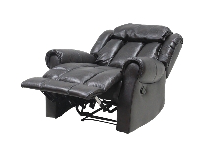

In [56]:
img = Image.open('../../2_data/img/19096361.jpg')
width, height = img.size
left = (width - (width*0.85))/2
top = (height - (width*0.65))/2
right = (width + (width*0.85))/2
bottom = (height + (width*0.65))/2
crop = img.crop((left, top, right, bottom))
r, g, b = crop.getpixel((55, 50))
rgb_color = (r, g, b)
print(rgb_color)
crop

In [21]:
import os
indir = '../../2_data/img/'
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        img = Image.open(indir+f)
        rgb = get_rgb(image)
        print(f)

NameError: name 'get_rgb' is not defined

In [22]:
def get_rgb(image):
    width, height = image.size
    left = (width - (width*0.85))/2
    top = (height - (width*0.65))/2
    right = (width + (width*0.85))/2
    bottom = (height + (width*0.65))/2
    crop = image.crop((left, top, right, bottom))
    r, g, b = crop.getpixel((55, 55))
    rgb_color = (r, g, b)
    return rgb_color

In [23]:
import os
import re
import numpy as np

indir = 'image/'
name_item = []
r_color = []
g_color = []
b_color = []
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        image = Image.open(indir+f)
        rgb = get_rgb(image)
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        r_color.append(r)
        g_color.append(g)
        b_color.append(b)
        file_name = f
        name = re.split(r'\.(?!\d)', file_name)[0]
        name_item.append(name)
#print(name_item)
r_color

[242,
 115,
 254,
 82,
 43,
 128,
 49,
 169,
 233,
 255,
 157,
 194,
 247,
 255,
 255,
 68,
 255,
 59,
 62,
 14,
 195,
 239]

In [24]:
df_item_rgb = pd.DataFrame({'MATNR':name_item, 'R':r_color, 'G':g_color, 'B':b_color})
df_item_rgb

,B,G,MATNR,R
0,233,237,19027088,242
1,63,75,19042700,115
2,252,254,19046597,254
3,86,81,19047585,82
4,19,31,19067390,43
5,128,128,19077272,128
6,0,11,19077731,49
7,140,158,19084433,169
8,230,232,19088990,233
9,255,255,19090396,255


In [25]:
df_item_rgb_arr = df_item_rgb[['MATNR','R','G','B']]
df_item_rgb_arr

,MATNR,R,G,B
0,19027088,242,237,233
1,19042700,115,75,63
2,19046597,254,254,252
3,19047585,82,81,86
4,19067390,43,31,19
5,19077272,128,128,128
6,19077731,49,11,0
7,19084433,169,158,140
8,19088990,233,232,230
9,19090396,255,255,255


# TEST 

In [26]:
df_item_rgb = pd.DataFrame({'MATNR':name_item, 'RGB':rgb_item})
df_item_rgb

NameError: name 'rgb_item' is not defined

(247, 247, 247)


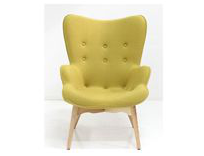

In [48]:
img = Image.open('image/19101766.jpg')
width, height = img.size
left = (width - (width*0.85))/2
top = (height - (width*0.65))/2
right = (width + (width*0.85))/2
bottom = (height + (width*0.65))/2
crop = img.crop((left, top, right, bottom))
r, g, b = crop.getpixel((55, 55))
rgb_color = (r, g, b)
print(rgb_color)
crop

In [29]:
tup = df_item_rgb['RGB'][0]
tup

KeyError: 'RGB'

In [30]:
import numpy as np
test = np.array([1,2,3])
test

array([1, 2, 3])

In [31]:
test * 2

array([2, 4, 6])

In [32]:
import numpy as np
tup = df_item_rgb['RGB']
tupp = list(tup)
tup_array = np.asarray(tupp)
list(tup_array)
tup_array *1

KeyError: 'RGB'

In [33]:
data1 = tup_array
data1

NameError: name 'tup_array' is not defined

In [34]:
power = data1**2
power

NameError: name 'data1' is not defined

In [35]:
testa = []
for i in power:
    sum_gr = sum(i)
    testa.append(sum_gr)
testa

NameError: name 'power' is not defined

In [36]:
sqrt_testa = []
for i in testa:
    sqrt_gr = i ** 0.5
    sqrt_testa.append(sqrt_gr)
sqrt_testa    

[]

In [37]:
max_rgb = np.array([255,255,255])
max_rgb

array([255, 255, 255])

In [38]:
sum_test = sum(power[0])
sum_test

NameError: name 'power' is not defined

In [39]:
sqrt_test = sum_test ** 0.5
sqrt_test

NameError: name 'sum_test' is not defined

In [40]:
x = df_item_rgb['RGB'][0]
x

KeyError: 'RGB'

In [41]:
bla = np.array([1,5,3])
bla.shape

(3,)

In [42]:
x/max_rgb

NameError: name 'x' is not defined

In [43]:
data2 = tup_array
data2

NameError: name 'tup_array' is not defined